**Introduction**

This project aims to explore the relationship between the utilization of budget on different marketing channels and the sales and subsequently build a **sales prediction model**. For this, we will be performing regression analysis, which includes creating and fitting a model, checking model assumptions, analyzing model performance, interpreting model coefficients, and also predicting the __sales output__ as per our desired budgets on various marketing channels.

__STEP 1: Imports__

_Import Packages_

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

_Load the Dataset_

In [224]:
real = pd.read_csv('marketing.csv')
real.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


__Step 2: Data Exploration__

_Let's familiarize with the data's features_

The features in the data are:
* TV promotion budget (in millions of dollars)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)

Each row corresponds to an independent marketing promotion where the business invests in TV, Social_Media, and Radio promotions to increase the overall Sales.

In [225]:
real.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


_Checking for any missing values in our dataset_

In [226]:
real.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [227]:
#Removing the missing values
real = real.dropna() 
real.isna().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [228]:
#Checking the number of rows and columns
real.shape

(4546, 5)

In [229]:
auto = real[['TV', 'Radio', 'Social Media', 'Sales']]
auto.corr()

,TV,Radio,Social Media,Sales
TV,1.000000,0.869158,0.527687,0.999497
Radio,0.869158,1.000000,0.606338,0.868638
Social Media,0.527687,0.606338,1.000000,0.527446
Sales,0.999497,0.868638,0.527446,1.000000


__Exploratory Data Analysis(EDA)__

We use visualizations like scatterplots, pairplot and correlation heatmaps before jumping into modelling in order to understand the patterns and relationships between the independent and dependent variables. 

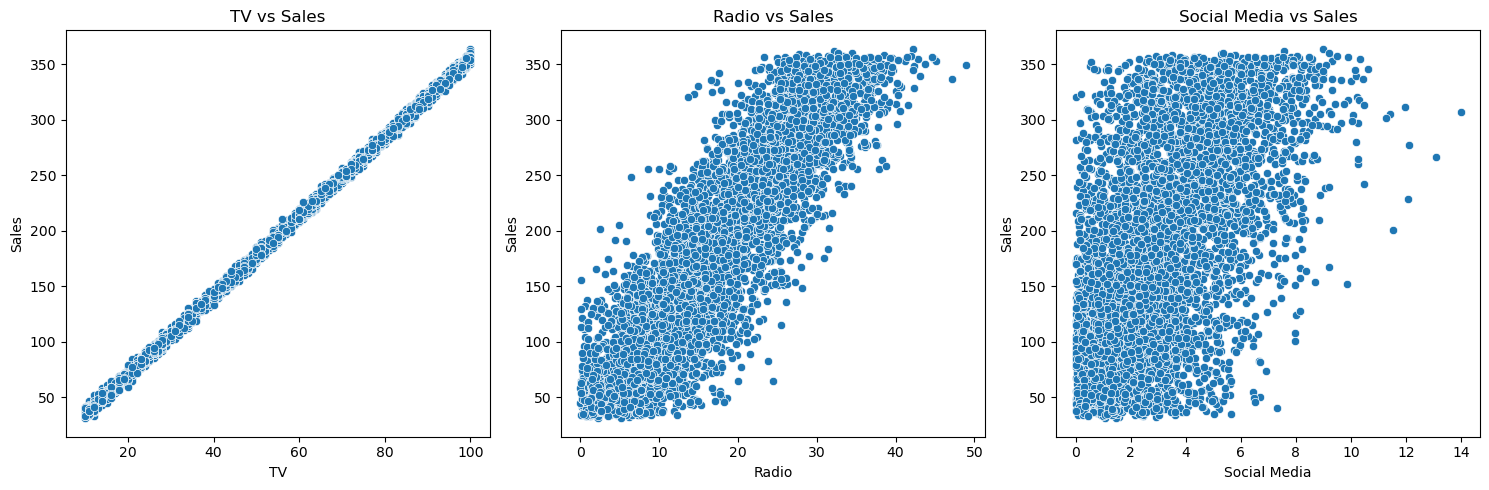

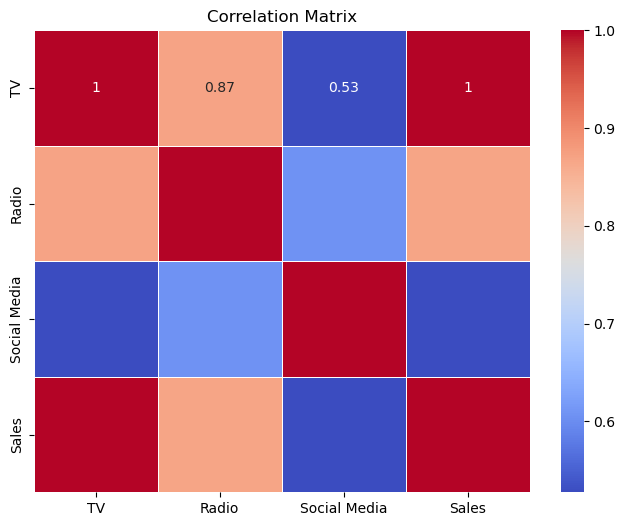

In [242]:
# Scatter plots to show relationship with Sales
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(ax=axes[0], x='TV', y='Sales', data=auto)
axes[0].set_title('TV vs Sales')
sns.scatterplot(ax=axes[1], x='Radio', y='Sales', data=auto)
axes[1].set_title('Radio vs Sales')
sns.scatterplot(ax=axes[2], x='Social Media', y='Sales', data=auto)
axes[2].set_title('Social Media vs Sales')
plt.tight_layout()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(auto.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


___Step 3:Model Building___

We will introduce the linear regression and polynomial regression and compare them based on performance metrics like RMSE and R-squared. 


In [235]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(auto, train_size = 0.85, test_size = 0.15, random_state = 1)

In [236]:
df_train.shape

(3864, 4)

In [237]:
df_test.shape

(682, 4)

In [265]:
from sklearn.linear_model import LinearRegression
X_train = df_train[['TV', 'Radio', 'Social Media']] #Making training dataset of independent variables

y_train = df_train['Sales'].astype('int') #Dependent variable

# df_test_predict = X_train.iloc[0:1]
# For linear regression
lm = LinearRegression()
lr_model = lm.fit(X_train, y_train)

# For polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=7)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

# model.predict(df_test_predict)

LinearRegression()

In [266]:
#Training accuracy
print("Linear regression = ",lr_model.score(X_train, y_train)*100) 
print("Polynomial regression = ",pol_reg.score(poly_reg.fit_transform(X_train), y_train)*100)




Linear regression =  99.89779594550069
Polynomial regression =  99.90024656439768


__Conclusion__

Both the Linear Regression and Polynomial Regression models are performing extremely well with very high accuracy (around 99.9%). However, since Linear Regression is simpler, it would be the preferred model. It avoids the risk of overfitting and is easier to implement, explain, and scale.

In [267]:
data = df_test.iloc[10:11] #Taking a row to compare with our prediction
actual_sales = data['Sales']
data = data.drop(['Sales'],axis=1)
data

,TV,Radio,Social Media
3645,57.0,2.45116,1.932471


In [272]:
print("Predicted Sales using linear regression",lr_model.predict(data))

print("Actual Sales",actual_sales)

Predicted Sales using linear regression [202.57267266]
Actual Sales 3645    201.431243
Name: Sales, dtype: float64


In [273]:
data = {'TV':[int(input("Enter TV budget (in millions) = ")) for i in range(1)],
        'Radio':[float(input("Enter Radio budget (in millions) = ")) for i in range(1)],
        "Social Media":[float(input("Enter Social Media budget (in millions) = ")) for i in range(1)],
        }

df = pd.DataFrame(data)

df

Enter TV budget (in millions) =  16
Enter Radio budget (in millions) =  6.5
Enter Social Media budget (in millions) =  2.5


,TV,Radio,Social Media
0,16,6.5,2.5


In [274]:
# predicted_salary = lr_model.predict(poly_reg.fit_transform(df))
predicted_sales = lr_model.predict(df)

print("predicted Sales",predicted_sales)

predicted Sales [56.32678212]


**Comparing the actual sales with predicted sales using a scatter plot**

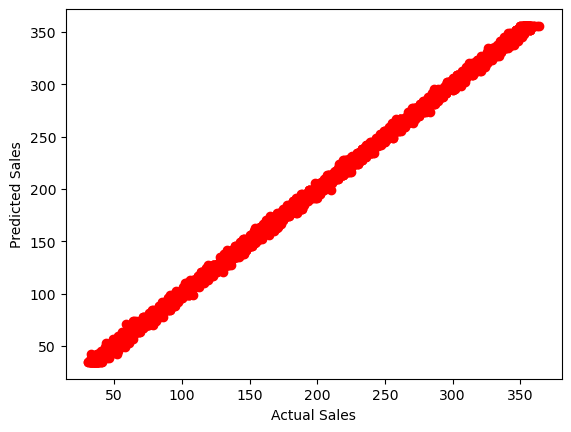

In [275]:
plt.scatter(y_train,lr_model.predict(X_train),color = 'red')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()

__Conclusion__

Since the points form a nearly perferct diagonal line, this suggests that the model's predictions are very close to the actual values, indicating that the model is performing well on the training data.